In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

## FAST Algorithm for Corner Detection

Выбирается пиксель-кандидат p и его интенсивность I.

Рассматривается окружность из 16 пикселей вокруг p (радиус 3).

Пиксель считается угловой точкой, если есть как минимум N (обычно 9-12) смежных пикселей в окружности, которые либо все ярче 


Для ускорения проверяются сначала 4 пикселя под углами 0°, 90°, 180°, 270°. Если условие не выполняется, точка сразу отвергается.

Особенности:
Скорость: Очень быстрый детектор (не вычисляет дескрипторы!).
Недостатки:
Нет инвариантности к масштабу и повороту.
Чувствителен к шуму.
Только детектирует точки, но не описывает их.

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 305


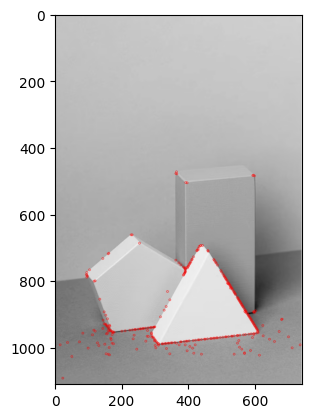

Total Keypoints without nonmaxSuppression: 793


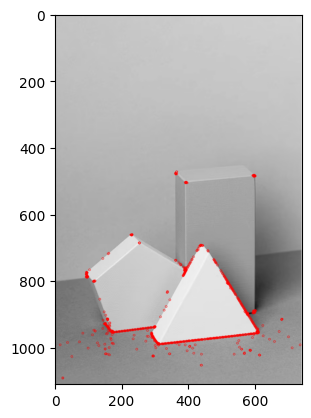

In [5]:
img = cv.imread('../../img/blocks.png', cv.IMREAD_GRAYSCALE) # `<opencv_root>/samples/data/blox.jpg`
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )

plt.imshow(img2)
plt.show()
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
plt.imshow(img3)
plt.show()

## BRIEF (Binary Robust Independent Elementary Features)

Основная идея: Создание бинарного дескриптора для уже найденных ключевых точек.

Как работает:
Для ключевой точки выбирается патч (окрестность) размера n×n.

В патче генерируется набор пар координат по заранее заданному распределению (например, гауссову).

Для каждой пары сравнивается интенсивность пикселей:

Результаты сравнений объединяются в бинарный дескриптор (обычно длиной 256-512 бит).

Особенности:
Скорость: Быстрое вычисление и сравнение (расстояние Хэмминга).

Недостатки:
Не инвариантен к поворотам и масштабу.
Только дескриптор (требует внешнего детектора точек, например, FAST).

In [2]:
img = cv.imread('../../img/blocks.png', cv.IMREAD_GRAYSCALE)
# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,None)
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
print( brief.descriptorSize() )
print( des.shape )

32
(23, 32)


## ORB (Oriented FAST and Rotated BRIEF)

Основная идея: Объединение улучшенной версии FAST и модифицированного BRIEF с добавлением инвариантности к повороту и масштапу.

Составляющие:

oFAST (Oriented FAST):
Использует детектор FAST.
Добавляет вычисление ориентации точки через интенсивность центроида патча.
Применяет пирамиду изображений для масштабной инвариантности. 

rBRIEF (Rotated BRIEF):
Модифицирует BRIEF, учитывая ориентацию ключевой точки.
Система координат для сравнения пикселей поворачивается в соответствии с направлением точки.
Использует алгоритм обучения для выбора наименее коррелированных пар пикселей.

Особенности:

Скорость: Сохраняет высокую скорость FAST и BRIEF.
Инвариантность: Устойчив к поворотам, масштабу и небольшим изменениям освещения.
Эффективность: Лучшая точность по сравнению с FAST+BRIEF.

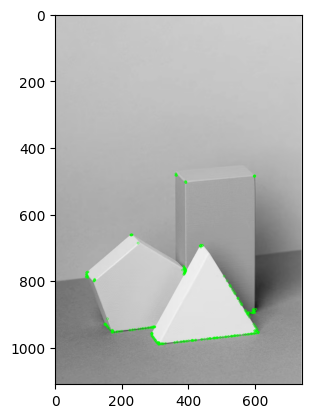

(<matplotlib.image.AxesImage at 0x13e37f352d0>, None)

In [3]:

img = cv.imread('../../img/blocks.png', cv.IMREAD_GRAYSCALE)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()